In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

data = pd.read_csv('raw_traffic_result.csv')

X = data[['speed', 'occupancy']]
y = data['volume']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f'R-squared (coefficient of determination): {model.score(X_test, y_test):.2f}')

print(f'Coefficients: {model.coef_}')

R-squared (coefficient of determination): 0.27
Coefficients: [0.03845155 0.25145524]


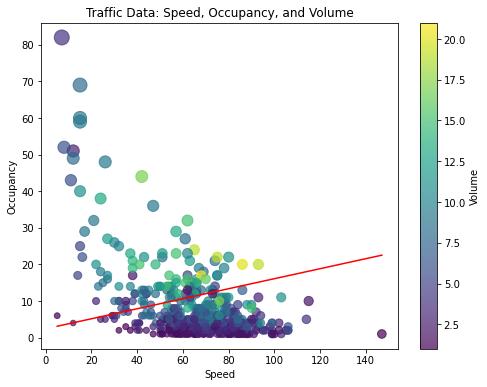

In [11]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(8, 6))

scatter = ax.scatter(X_test['speed'], X_test['occupancy'], c=y_test, cmap='viridis', s=y_pred*10, alpha=0.7)

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Volume')

ax.set_xlabel('Speed')
ax.set_ylabel('Occupancy')
ax.set_title('Traffic Data: Speed, Occupancy, and Volume')

ax.plot([min(X_test['speed']), max(X_test['speed'])], [min(y_pred), max(y_pred)], 'r-')

plt.show()